In [4]:
from OU import *
import time 

Let $(\Omega, \mathcal F, \mathbb Q)$ be a probability space supporting a two-dimensional Brownian motion $(W, W^{\perp})$. We denote by $(\mathcal F_t)_{t \geq 0}$ the filtration generated by $(W, W^{\perp})$. We set 
\begin{align}
        B = \rho W + \sqrt{1 - \rho^2} W^{\perp},
\end{align}
for some $\rho \in [-1, 1]$. We define the time-augmented process $\widehat{W}_t = (t, W_t)$ and we consider that the dynamics of the risky asset $S$, under the risk neutral probability measure $\mathbb Q$, are given by a stochastic volatility model where the volatility process $\Sigma$ is a (possibly infinite) linear combination of the signature of $\widehat{W}$: 
\begin{align*}
        \frac{d S_t}{S_t} &= \Sigma_t\,d B_t,  \\
        \Sigma_t &= \left\langle\boldsymbol{\sigma}_t, \widehat{\mathbb{W}}_t\right\rangle,
\end{align*}
    where $\boldsymbol{\sigma}: [0, T] \to \mathcal A$ corresponds to the parameters of the volatility process and is such that 
    \begin{align} 
        \int_0^T \mathbb E \left[\Sigma_t^2\right] \,d t < \infty.
    \end{align}
In practice we consider the truncatured form $\left\langle\boldsymbol{\sigma}_t^{\leq M}, \widehat{\mathbb{W}}_t\right\rangle = \left\langle\boldsymbol{\sigma}_t, \widehat{\mathbb{W}}_t^{\leq M}\right\rangle$.

In [16]:
N = 1
n = 252
T = 1
W, paths = generate_paths(N, n, T)

## I. OU 

In [19]:
x = 0.05
kappa = 1 
theta = 0.25 
eta = 1.2

X_true_1 = simulate_OU_euler(x, T, kappa, theta, eta, W)
X_raw_values_1 = []
X_reliable_values_1 = []

M_range = np.arange(2, 9)
for M in M_range : 
    X_raw_values_1.append(simulate_OU_signatures(M, x, kappa, theta, eta, paths, verbose=False))
    X_reliable_values_1.append(simulate_OU_signatures_time_dependent(M, x, kappa, theta, eta, T, paths, verbose=False))

In [21]:
x = 0.05
kappa = 4
theta = 0.25 
eta = 2

X_true_2 = simulate_OU_euler(x, T, kappa, theta, eta, W)
X_raw_values_2 = []
X_reliable_values_2 = []

M_range = np.arange(2, 9)
for M in M_range : 
    X_raw_values_2.append(simulate_OU_signatures(M, x, kappa, theta, eta, paths, verbose=False))
    X_reliable_values_2.append(simulate_OU_signatures_time_dependent(M, x, kappa, theta, eta, T, paths, verbose=False))

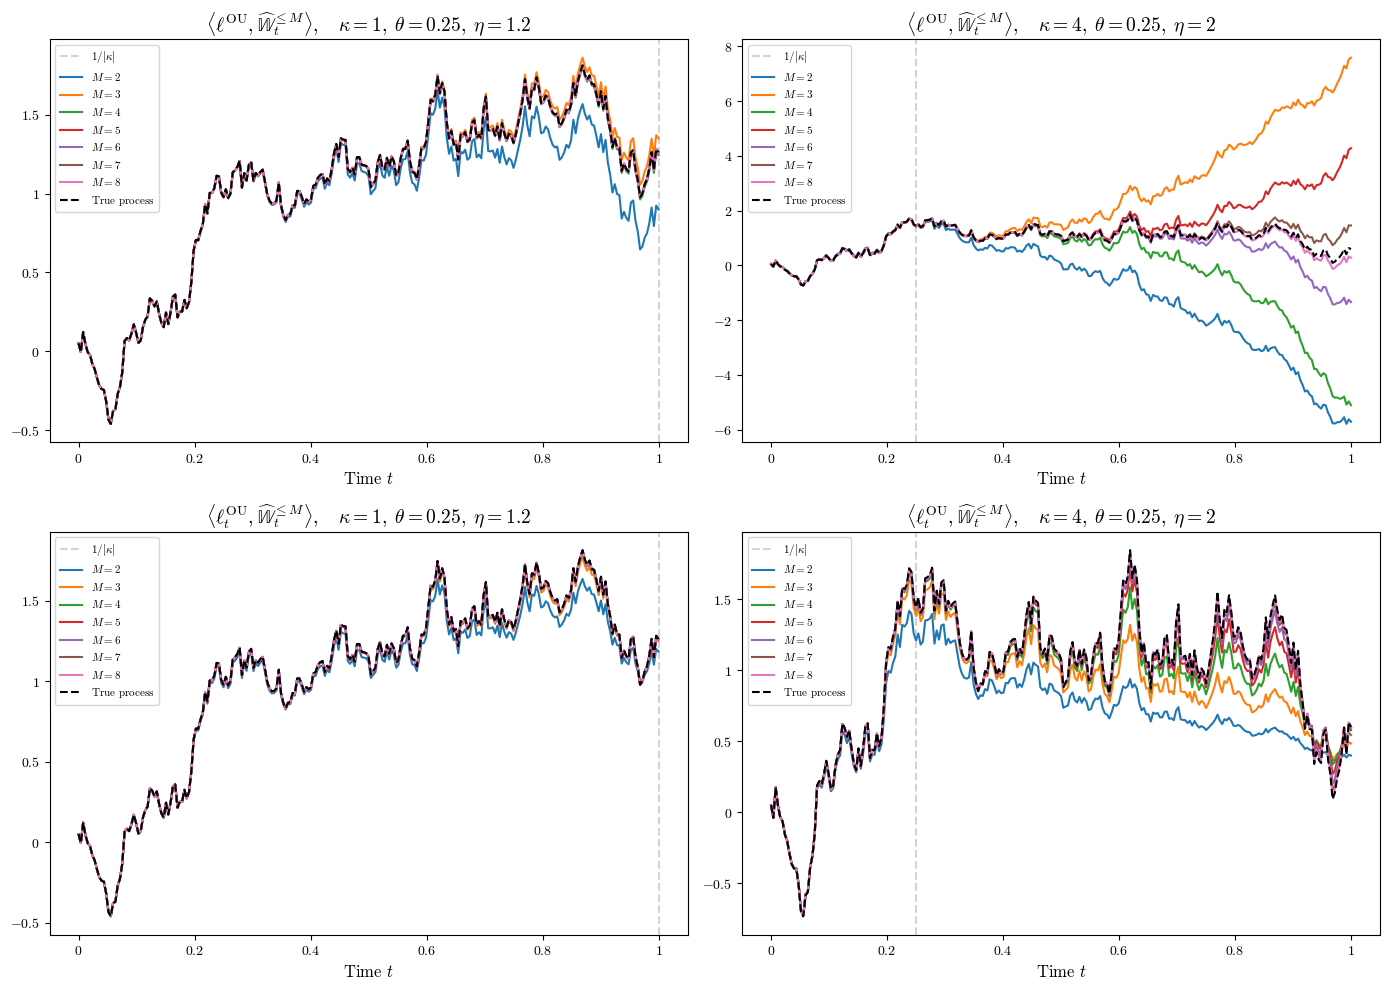

In [23]:
fig, axs = plt.subplots(2, 2, figsize=(7 * 2, 5 * 2))
ax = axs.flatten()

t_grid = np.linspace(0, T, n+1)

ax[0].axvline(1, color = "lightgray", linestyle = "--", label = r"$1/|\kappa|$") 
ax[1].axvline(1/4, color = "lightgray", linestyle = "--", label = r"$1/|\kappa|$") 
ax[2].axvline(1, color = "lightgray", linestyle = "--", label = r"$1/|\kappa|$") 
ax[3].axvline(1/4, color = "lightgray", linestyle = "--", label = r"$1/|\kappa|$") 


for i in range(len(M_range)) : 
    ax[0].plot(t_grid, X_raw_values_1[i][-1], label = fr"$M = {M_range[i]}$")
    ax[1].plot(t_grid, X_raw_values_2[i][-1], label = fr"$M = {M_range[i]}$")
    ax[2].plot(t_grid, X_reliable_values_1[i][-1], label = fr"$M = {M_range[i]}$")
    ax[3].plot(t_grid, X_reliable_values_2[i][-1], label = fr"$M = {M_range[i]}$")

ax[0].plot(t_grid, X_true_1[-1], color = "black", linestyle = "--", label = r"$\text{True process}$")
ax[1].plot(t_grid, X_true_2[-1], color = "black", linestyle = "--", label = r"$\text{True process}$")
ax[2].plot(t_grid, X_true_1[-1], color = "black", linestyle = "--", label = r"$\text{True process}$")
ax[3].plot(t_grid, X_true_2[-1], color = "black", linestyle = "--", label = r"$\text{True process}$")

ax[0].set_xlabel(r"$\text{Time }t$", fontsize=12)
ax[1].set_xlabel(r"$\text{Time }t$", fontsize=12)
ax[2].set_xlabel(r"$\text{Time }t$", fontsize=12)
ax[3].set_xlabel(r"$\text{Time }t$", fontsize=12)

ax[0].set_title(r"$\left\langle \mathbf{\ell}^\text{OU}, \widehat{\mathbb{W}}_t^{\leq M}\right\rangle,\quad \kappa = 1, \;\theta = 0.25, \;\eta = 1.2$", fontsize=14)
ax[1].set_title(r"$\left\langle \mathbf{\ell}^\text{OU}, \widehat{\mathbb{W}}_t^{\leq M}\right\rangle,\quad\kappa = 4, \;\theta = 0.25, \;\eta = 2$", fontsize=14)
ax[2].set_title(r"$\left\langle \mathbf{\ell}^\text{OU}_t, \widehat{\mathbb{W}}_t^{\leq M}\right\rangle,\quad\kappa = 1, \;\theta = 0.25, \;\eta = 1.2$", fontsize=14)
ax[3].set_title(r"$\left\langle \mathbf{\ell}^\text{OU}_t, \widehat{\mathbb{W}}_t^{\leq M}\right\rangle,\quad\kappa = 4, \;\theta = 0.25, \;\eta = 2$", fontsize=14)

ax[0].xaxis.set_major_formatter(lambda x, _: f"${x:g}$")
ax[0].yaxis.set_major_formatter(lambda y, _: f"${y:g}$")
ax[0].legend(fontsize=8, loc = "upper left")
ax[1].xaxis.set_major_formatter(lambda x, _: f"${x:g}$")
ax[1].yaxis.set_major_formatter(lambda y, _: f"${y:g}$")
ax[1].legend(fontsize=8, loc = "upper left")
ax[2].xaxis.set_major_formatter(lambda x, _: f"${x:g}$")
ax[2].yaxis.set_major_formatter(lambda y, _: f"${y:g}$")
ax[2].legend(fontsize=8, loc = "upper left")
ax[3].xaxis.set_major_formatter(lambda x, _: f"${x:g}$")
ax[3].yaxis.set_major_formatter(lambda y, _: f"${y:g}$")
ax[3].legend(fontsize=8, loc = "upper left")

plt.tight_layout()
plt.show()

## II. mGBM

In [42]:
N = 1
n = 252
T = 1
W, paths = generate_paths(N, n, T)

In [44]:
x = 0.25
kappa = 1 
theta = 0.25 
eta = 0.5
alpha = 1.6
X_true_1 = simulate_mGBM_exact(x, T, kappa, theta, eta, alpha, W)
X_raw_values_1 = []
X_reliable_values_1 = []

M_range = np.arange(2, 8)
for M in M_range : 
    X_raw_values_1.append(simulate_mGBM_signatures(M, x, kappa, theta, eta, alpha, paths, verbose=False))
    X_reliable_values_1.append(simulate_mGBM_signatures_time_dependent(M, x, kappa, theta, eta, alpha, T, paths, verbose=False))

In [45]:
x = 0.25
kappa = 4
theta = 0.25 
eta = 0.5
alpha = 2.0 

X_true_2 = simulate_mGBM_exact(x, T, kappa, theta, eta, alpha, W)
X_raw_values_2 = []
X_reliable_values_2 = []

M_range = np.arange(2, 8)
for M in M_range : 
    X_raw_values_2.append(simulate_mGBM_signatures(M, x, kappa, theta, eta, alpha, paths, verbose=False))
    X_reliable_values_2.append(simulate_mGBM_signatures_time_dependent(M, x, kappa, theta, eta, alpha, T, paths, verbose=False))

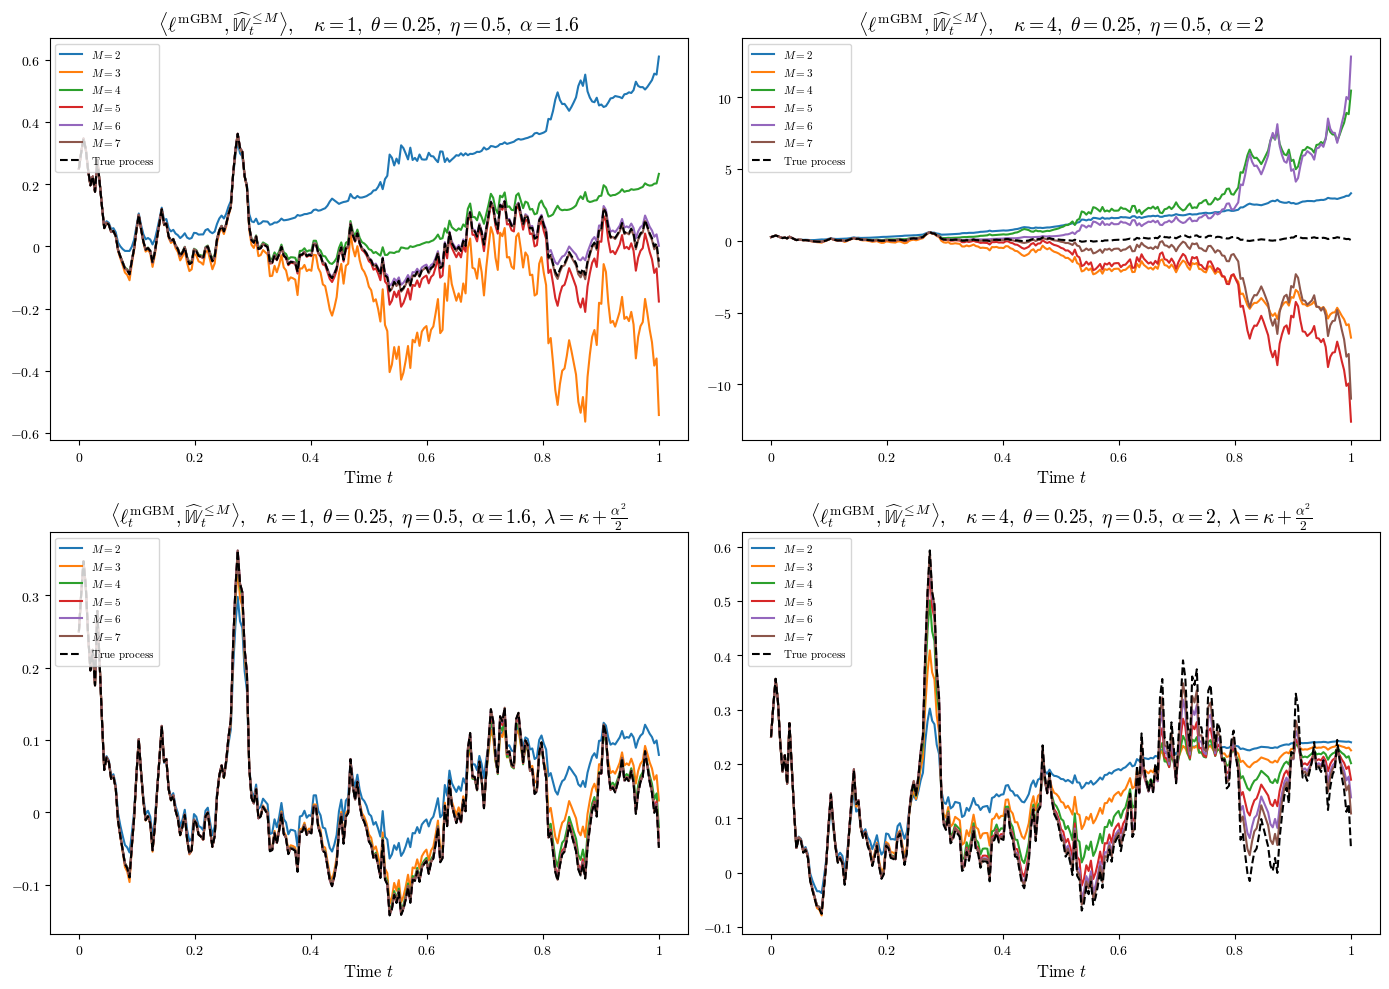

In [46]:
fig, axs = plt.subplots(2, 2, figsize=(7 * 2, 5 * 2))
ax = axs.flatten()

t_grid = np.linspace(0, T, n+1)

for i in range(len(M_range)) : 
    ax[0].plot(t_grid, X_raw_values_1[i][-1], label = fr"$M = {M_range[i]}$")
    ax[1].plot(t_grid, X_raw_values_2[i][-1], label = fr"$M = {M_range[i]}$")
    ax[2].plot(t_grid, X_reliable_values_1[i][-1], label = fr"$M = {M_range[i]}$")
    ax[3].plot(t_grid, X_reliable_values_2[i][-1], label = fr"$M = {M_range[i]}$")

ax[0].plot(t_grid, X_true_1[-1], color = "black", linestyle = "--", label = r"$\text{True process}$")
ax[1].plot(t_grid, X_true_2[-1], color = "black", linestyle = "--", label = r"$\text{True process}$")
ax[2].plot(t_grid, X_true_1[-1], color = "black", linestyle = "--", label = r"$\text{True process}$")
ax[3].plot(t_grid, X_true_2[-1], color = "black", linestyle = "--", label = r"$\text{True process}$")

ax[0].set_xlabel(r"$\text{Time }t$", fontsize=12)
ax[1].set_xlabel(r"$\text{Time }t$", fontsize=12)
ax[2].set_xlabel(r"$\text{Time }t$", fontsize=12)
ax[3].set_xlabel(r"$\text{Time }t$", fontsize=12)

ax[0].set_title(r"$\left\langle \mathbf{\ell}^\text{mGBM}, \widehat{\mathbb{W}}_t^{\leq M}\right\rangle,\quad \kappa = 1, \;\theta = 0.25, \;\eta = 0.5, \; \alpha = 1.6$", fontsize=14)
ax[1].set_title(r"$\left\langle \mathbf{\ell}^\text{mGBM}, \widehat{\mathbb{W}}_t^{\leq M}\right\rangle,\quad\kappa = 4, \;\theta = 0.25, \;\eta = 0.5, \; \alpha = 2$", fontsize=14)
ax[2].set_title(r"$\left\langle \mathbf{\ell}^\text{mGBM}_t, \widehat{\mathbb{W}}_t^{\leq M}\right\rangle,\quad\kappa = 1, \;\theta = 0.25, \;\eta = 0.5, \; \alpha = 1.6,\; \lambda = \kappa + \frac{\alpha^2}{2}$", fontsize=14)
ax[3].set_title(r"$\left\langle \mathbf{\ell}^\text{mGBM}_t, \widehat{\mathbb{W}}_t^{\leq M}\right\rangle,\quad\kappa = 4, \;\theta = 0.25, \;\eta = 0.5, \; \alpha = 2,\; \lambda = \kappa + \frac{\alpha^2}{2}$", fontsize=14)

ax[0].xaxis.set_major_formatter(lambda x, _: f"${x:g}$")
ax[0].yaxis.set_major_formatter(lambda y, _: f"${y:g}$")
ax[0].legend(fontsize=8, loc = "upper left")
ax[1].xaxis.set_major_formatter(lambda x, _: f"${x:g}$")
ax[1].yaxis.set_major_formatter(lambda y, _: f"${y:g}$")
ax[1].legend(fontsize=8, loc = "upper left")
ax[2].xaxis.set_major_formatter(lambda x, _: f"${x:g}$")
ax[2].yaxis.set_major_formatter(lambda y, _: f"${y:g}$")
ax[2].legend(fontsize=8, loc = "upper left")
ax[3].xaxis.set_major_formatter(lambda x, _: f"${x:g}$")
ax[3].yaxis.set_major_formatter(lambda y, _: f"${y:g}$")
ax[3].legend(fontsize=8, loc = "upper left")

plt.tight_layout()
plt.show()

## III. CIR 

In [50]:
x = 0.5 
v = x**2
kappa = 1 
theta = 0.25
eta = 0.7

X_true_1 = simulate_CIR_euler(v, T, kappa, theta, eta, W)
X_values_1 = []

M_range = np.arange(2, 5)
for M in tqdm(M_range) : 
    sigma_CIR, _, _, _ = compute_sigma_CIR(v, kappa, theta, eta, M, verbose=False)
    l_CIR = shuffle(sigma_CIR, sigma_CIR, M)
    l = dict_to_vector(l_CIR, 2, M)
    X_values_1.append(simulate_sigma(M, v, T, paths, l, verbose=False))

100%|█████████████████████████████████████████████| 3/3 [00:04<00:00,  1.51s/it]


In [52]:
kappa = 4
theta = 0.25
eta = 1.4

X_true_2 = simulate_CIR_euler(v, T, kappa, theta, eta, W)
X_values_2 = []

M_range = np.arange(2, 5)
for M in tqdm(M_range) : 
    sigma_CIR, _, _, _ = compute_sigma_CIR(v, kappa, theta, eta, M, verbose=False)
    l_CIR = shuffle(sigma_CIR, sigma_CIR, M)
    l = dict_to_vector(l_CIR, 2, M)
    X_values_2.append(simulate_sigma(M, v, T, paths, l, verbose=False))

100%|█████████████████████████████████████████████| 3/3 [00:31<00:00, 10.37s/it]


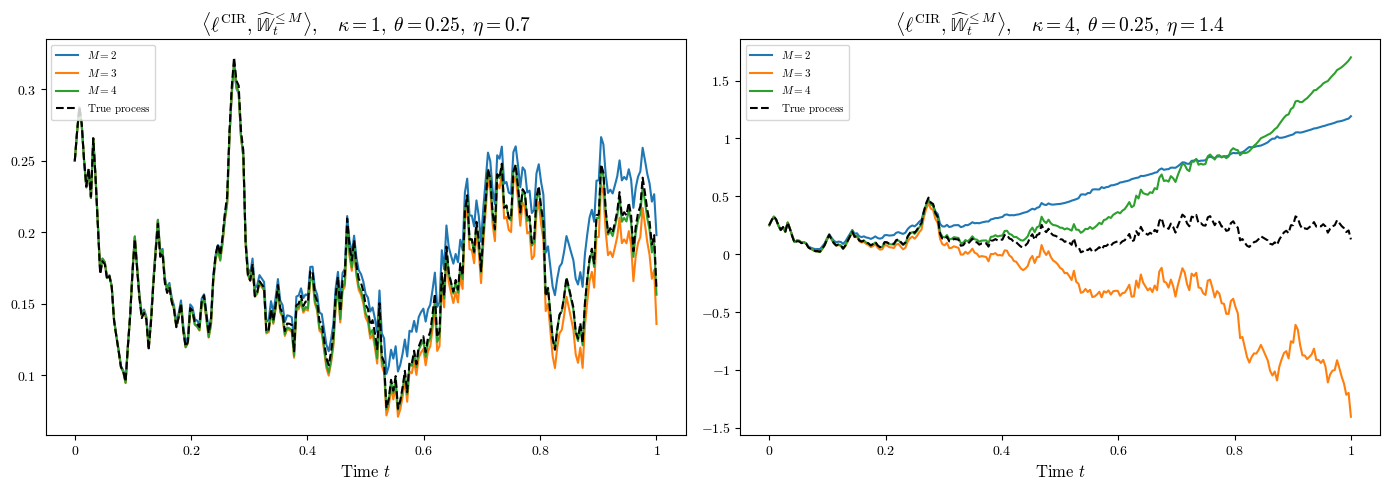

In [54]:
fig, axs = plt.subplots(1, 2, figsize=(7 * 2, 5 * 1))
ax = axs.flatten()

t_grid = np.linspace(0, T, n+1)

for i in range(len(M_range)) : 
    ax[0].plot(t_grid, X_values_1[i][-1], label = fr"$M = {M_range[i]}$")
    ax[1].plot(t_grid, X_values_2[i][-1], label = fr"$M = {M_range[i]}$")

ax[0].plot(t_grid, X_true_1[0], color = "black", linestyle = "--", label = r"$\text{True process}$")
ax[1].plot(t_grid, X_true_2[0], color = "black", linestyle = "--", label = r"$\text{True process}$")

ax[0].set_xlabel(r"$\text{Time }t$", fontsize=12)
ax[1].set_xlabel(r"$\text{Time }t$", fontsize=12)


ax[0].set_title(r"$\left\langle \mathbf{\ell}^\text{CIR}, \widehat{\mathbb{W}}_t^{\leq M}\right\rangle,\quad \kappa = 1, \;\theta = 0.25, \;\eta = 0.7$", fontsize=14)
ax[1].set_title(r"$\left\langle \mathbf{\ell}^\text{CIR}, \widehat{\mathbb{W}}_t^{\leq M}\right\rangle,\quad\kappa = 4, \;\theta = 0.25, \;\eta = 1.4$", fontsize=14)


ax[0].xaxis.set_major_formatter(lambda x, _: f"${x:g}$")
ax[0].yaxis.set_major_formatter(lambda y, _: f"${y:g}$")
ax[0].legend(fontsize=8, loc = "upper left")
ax[1].xaxis.set_major_formatter(lambda x, _: f"${x:g}$")
ax[1].yaxis.set_major_formatter(lambda y, _: f"${y:g}$")
ax[1].legend(fontsize=8, loc = "upper left")

plt.tight_layout()
plt.show()

## IV. Riemann Liouville fBM 

In [109]:
N = 1
n = 1000
T = 1
W, paths = generate_paths(N, n, T)

#### IV.1. Trajectories

In [112]:
M_values = np.arange(1, 17) 
H_values = [0.1, 0.3, 0.7, 0.9]

eps = 1/52

euler_traj = []
signatures_traj = []

for i, H in enumerate(tqdm(H_values)) :
    euler_traj.append(simulate_shifted_fBM_euler(T, H, eps, W)[0])
    v = []
    for j, M in enumerate(M_values) : 
        v.append(simulate_shifted_fBM_signatures_time_dependent(M, H, eps, T, paths, verbose=False)[0])
    signatures_traj.append(v)

euler_traj = np.array(euler_traj)
signatures_traj = np.array(signatures_traj)

100%|█████████████████████████████████████████████| 4/4 [00:18<00:00,  4.74s/it]


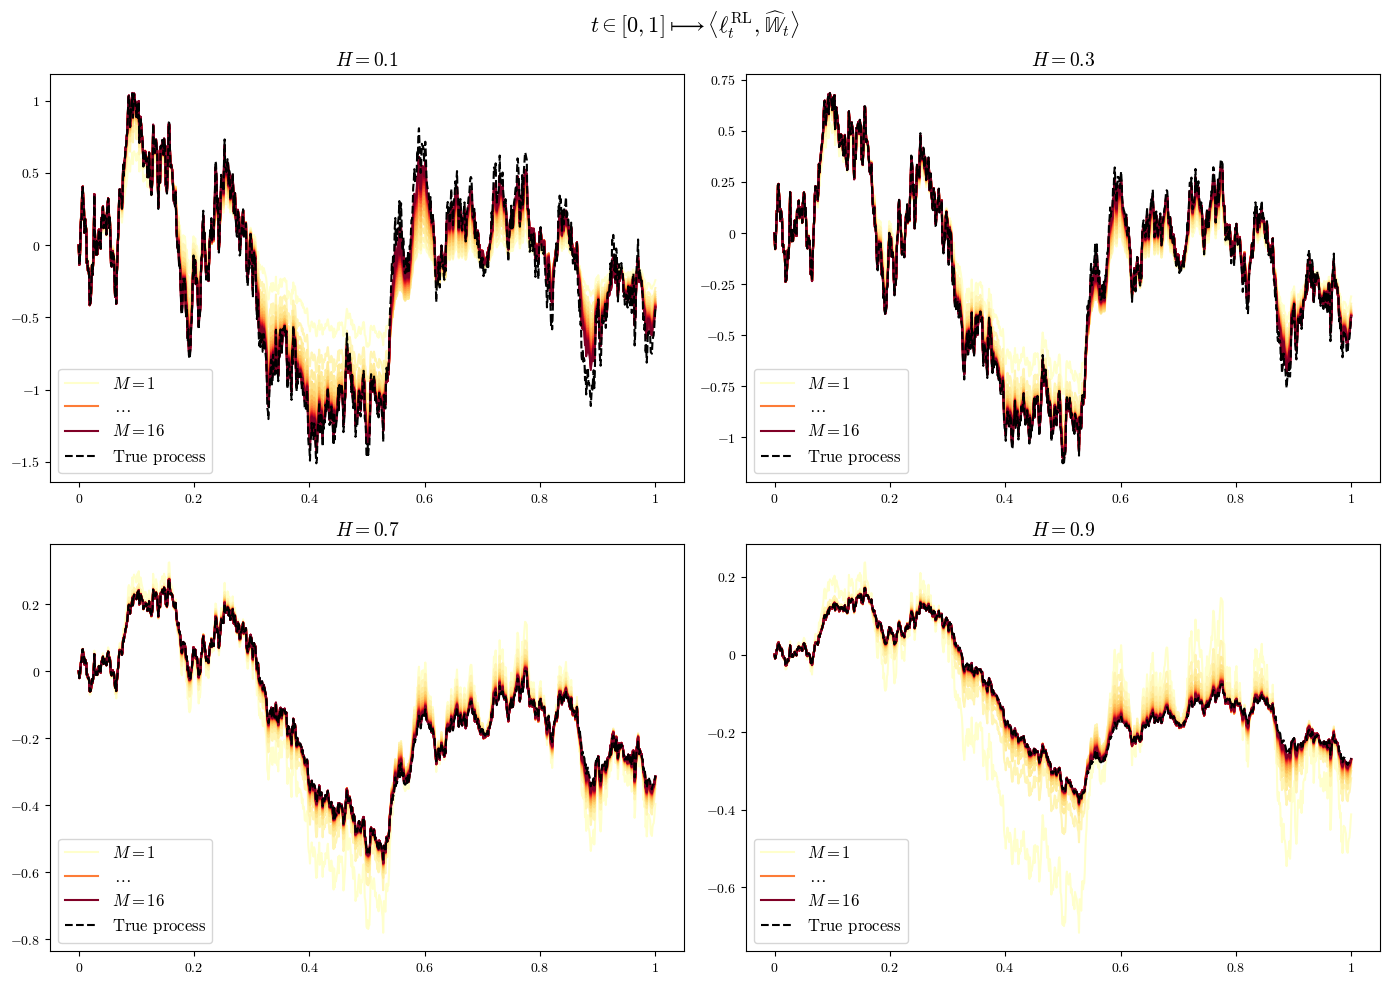

In [142]:
fig, ax = plt.subplots(2, 2, figsize = (7*2, 5*2))
ax = ax.flatten()

t_grid = np.linspace(0, T, n+1) 

cmap = plt.get_cmap("YlOrRd", len(M_values))
norm = mcolors.Normalize(vmin=M_values.min(), vmax=M_values.max())
sm = cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])

for i, H in enumerate(H_values) :
    for j, M in enumerate(M_values) :
        color = cmap(norm(M))
        if j == 0 or j == len(M_values)-1 : 
            ax[i].plot(t_grid, signatures_traj[i][j], color = color, label = fr"$M = {M}$")
        elif j == len(M_values)//2 : 
            ax[i].plot(t_grid, signatures_traj[i][j], color = color, label = r"$\dots$")
        else : 
            ax[i].plot(t_grid, signatures_traj[i][j], color = color)
    
    ax[i].plot(t_grid, euler_traj[i], color = "black", linestyle ="--", label = r"$\text{True process}$")
    ax[i].legend(fontsize=12)
    

    ax[i].xaxis.set_major_formatter(lambda x, _: f"${x:g}$")
    ax[i].yaxis.set_major_formatter(lambda y, _: f"${y:g}$")
    ax[i].set_title(fr"$H = {H}$", fontsize=14)

fig.suptitle(r"$t\in [0,1]\longmapsto \left\langle \ell^{\text{RL}}_t, \widehat{\mathbb{W}}_t\right\rangle$", fontsize=16)
plt.tight_layout()
plt.show()

#### IV.2. MSE 

In [103]:
N = 100000
n = 252
T = 1
W, paths = generate_paths(N, n, T)

In [133]:
H_values = [0.1, 0.3, 0.7, 0.9]
M_values = [2, 4, 8, 16]
T = 1 
eps = 1/52
N = 100
n = 252 

In [135]:
df = MSE_shifted_fBM(H_values, M_values, N, n, T, eps, verbose=True) 

H: 100%|██████████████████████████████████████████| 4/4 [01:33<00:00, 23.33s/it]


In [137]:
df 

,0.1,0.3,0.7,0.9
2,0.102195,0.016893,0.004374,0.006847
4,0.046893,0.006246,0.000924,0.001016
8,0.017026,0.001843,0.000165,0.000134
16,0.004272,0.000374,0.00002,0.000013


## V. Delayed equation process 

In [36]:
N = 1
n = 1000
T = 1
W, paths = generate_paths(N, n, T)

#### V.1. Trajectories

In [38]:
a1 = 1 
b1 = 1
c1 = -2
lambda1 = 1
a2 = -0.5 
c2 = -2 
lambda2 = 1.5
u = 0.25 

X_true_1 = []
X_values_1 = []
M_range = np.arange(1, 8)
for M in M_range : 
    X_true_1.append(simulate_DE_euler(T, u, a1, b1, c1, lambda1, a2, c2, lambda2, W)[0])
    X_values_1.append(simulate_DE_signatures(M, u, a1, b1, c1, lambda1, a2, c2, lambda2, paths, verbose=False))

In [40]:
a1 = 2
b1 = 2
c1 = -2
lambda1 = 4
a2 = 1 
c2 = -1 
lambda2 = -4
u = 0.25 

X_true_2 = []
X_values_2 = []
M_range = np.arange(1, 8)
for M in M_range : 
    X_true_2.append(simulate_DE_euler(T, u, a1, b1, c1, lambda1, a2, c2, lambda2, W)[0])
    X_values_2.append(simulate_DE_signatures(M, u, a1, b1, c1, lambda1, a2, c2, lambda2, paths, verbose=False))

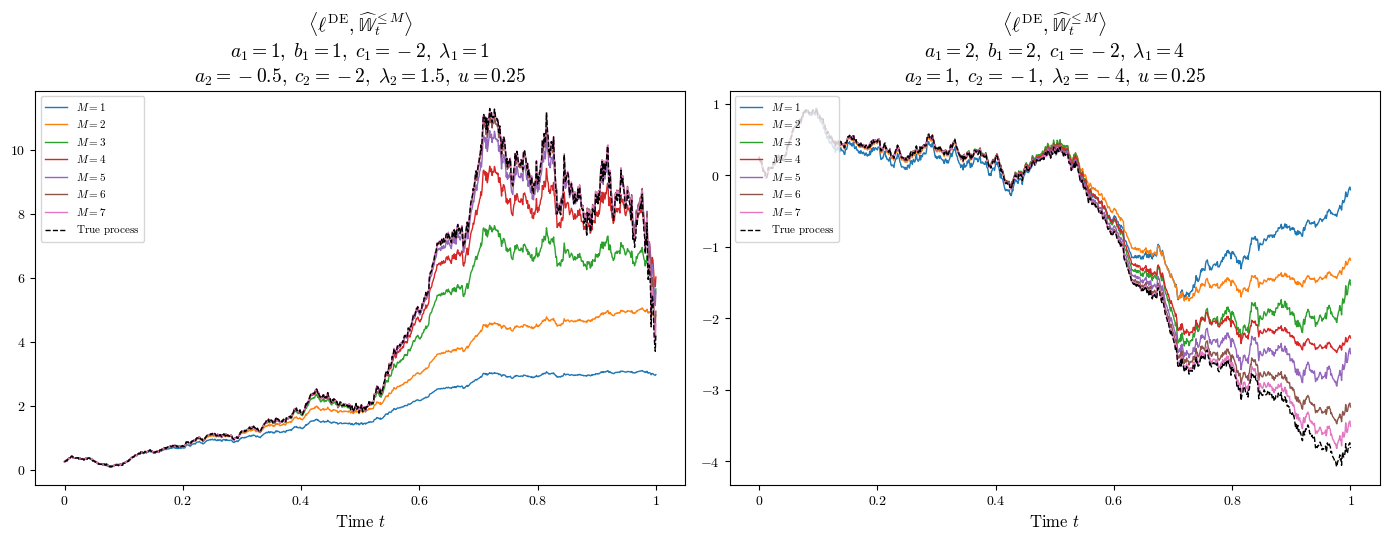

In [44]:
fig, ax = plt.subplots(1, 2, figsize=(7 * 2, 5.5))

t_grid = np.linspace(0, T, n+1)

for i in range(len(M_range)) : 
    ax[0].plot(t_grid, X_values_1[i][-1], lw = 1, label = fr"$M = {M_range[i]}$")
    ax[1].plot(t_grid, X_values_2[i][-1], lw = 1, label = fr"$M = {M_range[i]}$")

ax[0].plot(t_grid, X_true_1[-1], color = "black", linestyle = "--", lw=1, label = r"$\text{True process}$")
ax[1].plot(t_grid, X_true_2[-1], color = "black", linestyle = "--", lw=1, label = r"$\text{True process}$")

ax[0].set_xlabel(r"$\text{Time }t$", fontsize=12)
ax[1].set_xlabel(r"$\text{Time }t$", fontsize=12)

ax[0].set_title(
    r"$\left\langle \mathbf{\ell}^\text{DE}, \widehat{\mathbb{W}}_t^{\leq M}\right\rangle$"
    "\n"
    r"$a_1=1,\; b_1=1,\; c_1=-2,\; \lambda_1=1$"
    "\n"
    r"$a_2=-0.5,\; c_2=-2,\; \lambda_2=1.5,\; u=0.25$",
    fontsize=14)

ax[1].set_title(
    r"$\left\langle \mathbf{\ell}^\text{DE}, \widehat{\mathbb{W}}_t^{\leq M}\right\rangle$"
    "\n"
    r"$a_1 = 2,\; b_1 = 2,\; c_1 = -2, \; \lambda_1 =4$"
    "\n"
    r"$a_2=1,\; c_2=-1,\; \lambda_2=-4,\; u=0.25$",
    fontsize=14)
ax[0].xaxis.set_major_formatter(lambda x, _: f"${x:g}$")
ax[0].yaxis.set_major_formatter(lambda y, _: f"${y:g}$")
ax[0].legend(fontsize=8, loc = "upper left")
ax[1].xaxis.set_major_formatter(lambda x, _: f"${x:g}$")
ax[1].yaxis.set_major_formatter(lambda y, _: f"${y:g}$")
ax[1].legend(fontsize=8, loc = "upper left")

plt.tight_layout()
#plt.savefig("DE.pdf")
plt.show()

#### V.2. MSE

In [145]:
set1 = (0.25, 1, 1, -2, 1, -0.5 , -2, 1.5)
set2 = (0.25, 2, 2, -2, 4, 1, -1 , -4)

In [154]:
def MSE_DE(set1, set2, M_values, N, T, verbose=True) : 
    df = pd.DataFrame(index = M_values, columns = ["(a)", "(b)"])
    W, paths = generate_paths(N, n, T)

    u, a1, b1, c1, lambda1, a2, c2, lambda2 = set1 
    u_, a1_, b1_, c1_, lambda1_, a2_, c2_, lambda2_ = set2

    X_reference = simulate_DE_euler(T, u, a1, b1, c1, lambda1, a2, c2, lambda2, W)
    X_reference_ = simulate_DE_euler(T, u_, a1_, b1_, c1_, lambda1_, a2_, c2_, lambda2_, W)
    

    for M in (tqdm(M_values, desc="M") if verbose else M_values):
        X_signature = simulate_DE_signatures(M, u, a1, b1, c1, lambda1, a2, c2, lambda2, paths, verbose=False)
        X_signature_ = simulate_DE_signatures(M, u_, a1_, b1_, c1_, lambda1_, a2_, c2_, lambda2_, paths, verbose=False)
        diff = X_reference - X_signature      
        mse = np.mean(diff**2)
        diff_ = X_reference_ - X_signature_      
        mse_ = np.mean(diff_**2)
        df.loc[M, "(a)"] = mse
        df.loc[M, "(b)"] = mse_

    return df 

In [159]:
M_values = [2, 4, 8, 16]
N = 100
T = 1 

In [161]:
df = MSE_DE(set1, set2, M_values, N, T, verbose=True)
df

M: 100%|██████████████████████████████████████████| 4/4 [01:04<00:00, 16.24s/it]


,(a),(b)
2,0.422014,2.935243
4,0.010092,1.799361
8,0.000169,0.003757
16,0.000161,0.009266
